<a href="https://colab.research.google.com/github/c-bujari/CAP4630/blob/master/HW_3/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework Assignment 3
###CAP 4630 Artificial Intelligience
####Clyde Bujari

## Problem 1
Implement the function get_random_data(w, b, mu, sigma, m) that generates random data for logisitic regression with two features, x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
## w, b, mu, sigma are constants for statistics stuff
## m is the number of rows of data you want.
def get_random_data(w, b, mu, sigma, m):

  ## Class labels for each entry should be either 0 or 1 
  labels = np.random.randint(2, size=(m, 1))

  ## Generate the data array
  ## In order to create an array of the correct shape, I assigned random values to both
  ## x_1 and x_2. This is, however, less inefficient than adding new entries to the array,
  ## as numpy would be reallocating the memory for the array each time.
  data = np.random.rand(m, 2)

  ## Create an np array of samples from the normal distribution with mean mu and sd sigma
  samples = np.random.default_rng().normal(mu, sigma, 1000)

  ## Second feature x_2 = w * x_1 + b + (-1)^c * n
  for data_row, label_row, n, in zip(data, labels, samples):
    ## For some reason, python thinks that -1^c ALWAYS = -1, so I am using an if statement instead.
    ## Original statment: data_row[1] = w * data_row[0] + b + (-1**label_row[0]) * n
    if(label_row[0]):
      data_row[1] = w * data_row[0] + b + -1 * n
    else:
      data_row[1] = w * data_row[0] + b + n

  return labels, data


Implement the function display_random_data that takes as input the above two arrays labels and data. It should create scatter plot of the 2D points stored in data. Use red dots to plot the points whose labels are 1 and blue dots to plot the points whose labels are 0.

In [0]:
def display_random_data(labels, data):
  for l, d in zip(labels, data):
    if(l):
      plt.plot(d[0], d[1], "r.")
    else:
      plt.plot(d[0], d[1], "b.")

  plt.xlabel("$x_1$", fontsize=18)
  plt.ylabel("$x_2$", rotation=0, fontsize=18)
  plt.axis([0, 1, -15, 15])
  plt.show()

In [0]:
## Constants used to call get_random_data
w = 10
b = -5
mu = 3
sigma = 1
m = 100

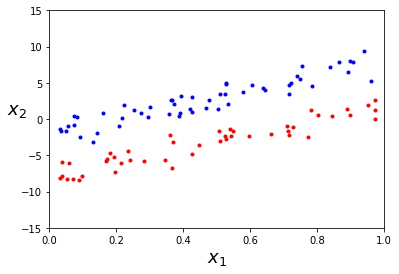

In [81]:
## Generate random data
labels, data = get_random_data(w, b, mu, sigma, m)

## Display scatter plot
display_random_data(labels, data)

Split the data/labels into a training set (80%) and a test set (20%).

In [0]:
## Scikit-learn includes a handy function to do this automatically
from sklearn.model_selection import train_test_split

## Split the data generated into a training set (80%) and a test set (20%)
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size = 0.8, test_size = 0.2)

##Problem 2 ~~ Finished, but with mistakes.
Create a Keras to implement logistic regression with two features and train it with the data generated in Problem 1. The loss should be the binary cross entropy loss.

In [0]:
%tensorflow_version 2.x
from tensorflow.keras import models
from tensorflow.keras import layers

Initalize the model, using binary cross entropy as the loss function as directed in instructions.

In [0]:
##network = models.Sequential([
##  layers.Dense(4, activation='relu', input_shape=(2,)),
##  layers.Dense(1, activation='relu')
##])

network = models.Sequential()
network.add(layers.Dense(train_labels.shape[1],
                  activation='sigmoid',
                  input_dim=(train_data.shape[1])))

network.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [85]:
network.fit(train_data, train_labels, epochs=20, batch_size = 8, validation_data=(test_data,test_labels), verbose=1)

Epoch 1/20
10/10 [==============================] - 0s 11ms/step - loss: 2.8920 - accuracy: 0.2125 - val_loss: 2.3889 - val_accuracy: 0.0500
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 2.0139 - accuracy: 0.2250 - val_loss: 1.5673 - val_accuracy: 0.0500
Epoch 3/20
10/10 [==============================] - 0s 5ms/step - loss: 1.2714 - accuracy: 0.2625 - val_loss: 0.9576 - val_accuracy: 0.1500
Epoch 4/20
10/10 [==============================] - 0s 4ms/step - loss: 0.7972 - accuracy: 0.4375 - val_loss: 0.6375 - val_accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 0s 5ms/step - loss: 0.5798 - accuracy: 0.6625 - val_loss: 0.4936 - val_accuracy: 0.8500
Epoch 6/20
10/10 [==============================] - 0s 5ms/step - loss: 0.4880 - accuracy: 0.8250 - val_loss: 0.4220 - val_accuracy: 0.8500
Epoch 7/20
10/10 [==============================] - 0s 4ms/step - loss: 0.4430 - accuracy: 0.8375 - val_loss: 0.3793 - val_accuracy: 0.9500
Epoch 8/20
10/10 [=

In [86]:
#test_loss, test_acc = network.evaluate(test_data, test_labels)

accuracy, loss = network.evaluate(test_data, test_labels, verbose=2)

1/1 - 0s - loss: 0.2589 - accuracy: 1.0000


Function for plotting results

In [0]:
def display_all_data(labels, data, w, b):
  ## Start by displaying the original scatter plot
  for l, d in zip(labels, data):
    if(l):
      plt.plot(d[0], d[1], "r.")
    else:
      plt.plot(d[0], d[1], "b.")

  ## Display the expected line
  x = np.array(np.arange(0, 1.1, 0.1))
  def true_line_formula(x):
    return w * x + b
  y = true_line_formula(x)

  plt.plot(x, y, 'c')  

  weights = network.layers[0].get_weights()[0]
  bias = network.layers[0].get_weights()[1]

  ## Since w1 x1 + w2 x2 + b = 0, x_2 = -(w1 * x1 + b) / w2 
  #x_2 = -1 * (weights[0] * data[0] + bias) / weights[1]

  x_2 = data

  def model_line_formula(x, w, b):
    return -1 * (w[0] * x + b) / w[1]
  y = model_line_formula(x, weights, bias)

  plt.plot(x, y, 'm')

  plt.xlabel("$x_1$", fontsize=18)
  plt.ylabel("$x_2$", rotation=0, fontsize=18)
  plt.axis([0, 1, -15, 15])
  plt.show()

Displays original scatter plot of the random data, as well as the true,
expected line dividing this data (in blue) and the line keras derived (in magenta).

The plot below shows that either my implementation of the model or my method of plotting is clearly flawed.

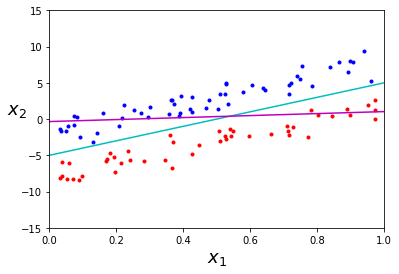

In [94]:

display_all_data(labels, data, w, b)

# Problem 3 ~~ ***UNFINISHED***
Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.

The following expression is the output of the neuron when given a feature vector $x=(x_1,\ldots,x_n)^T\in R^n$, represented in this code as the data numpy array, as input.

\begin{equation}
\hat{y} = a\left( \sum_{j=1}^n w_j x_j + b \right)
\end{equation}


In [0]:
## Begin with the sum


Performing gradient descent - this is pulled directly from [linear_regression_gradient_descent.ipynb](https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-#scrollTo=QwrdvAfuiRaf), I was not able to make any changes or adjustments to it because I ran out of time, but I wanted to show where I would have started.

In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent
initial_weight = np.random.randn(2, 1) 

In [0]:
weight = initial_weight
weight_path_sgd = []

# plot training data
plt.plot(X, y, "b.")
# plot initial prediction
y_predict = X_new_b.dot(weight)                    
plt.plot(X_new, y_predict, "r--")        

weight_path_sgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(m):           
        xi = X_b_shuffled[i:i+1]
        yi = y_shuffled[i:i+1]
        gradient = xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_sgd.append(weight)
        
        y_predict = X_new_b.dot(weight)                    
        plt.plot(X_new, y_predict, "b-")        
    
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                              
plt.show()     